# **KDD for Diabetes**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Pre-processing**

Loading the dataset:

In [2]:
import pandas as pd

# Load the dataset
diabetes_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/diabetes.csv')

# Display the first few rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for missing values in the dataset
missing_values = diabetes_data.isnull().sum()

missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetic                    0
dtype: int64

There are no missing values, great!

Now, lets look at the distrbution of variables.

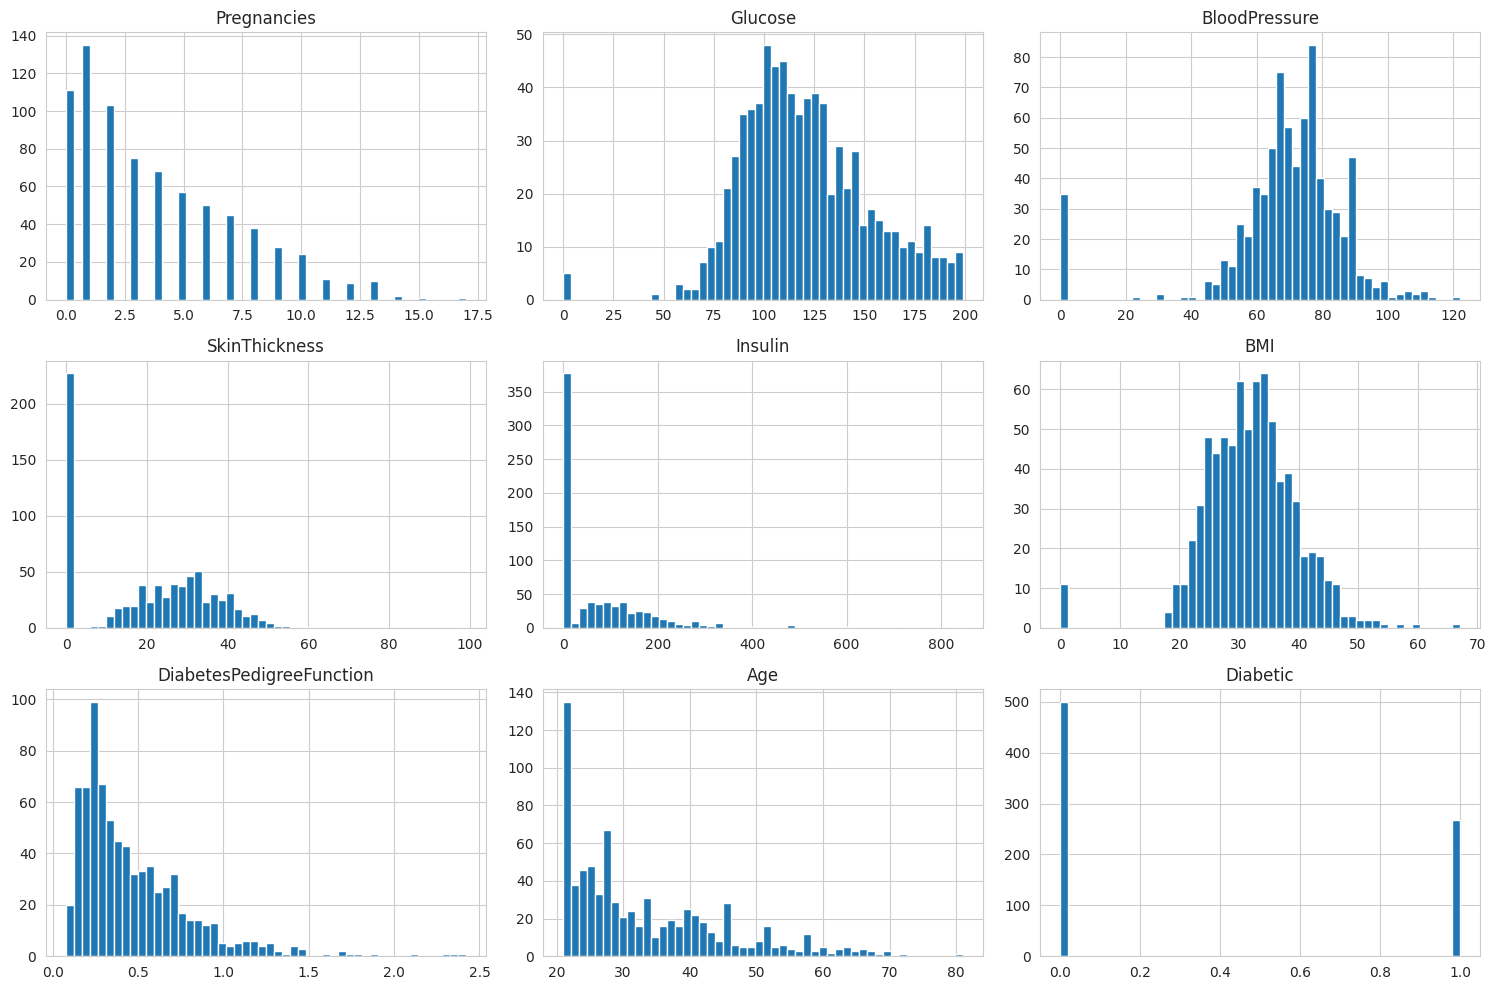

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plot histograms for each column in the dataset
diabetes_data.hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

Concerning the zero values in some features (like Glucose, BloodPressure, SkinThickness, Insulin, BMI), we might need to address these before proceeding further. Zero values in these features are biologically implausible and may represent missing data.

## **Data Transformation**

In [8]:
# Columns where zero values are biologically implausible
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Use the `where` method to replace zero values with NaN
for col in columns_with_zeros:
    diabetes_data[col] = diabetes_data[col].where(diabetes_data[col] != 0, other=pd.NA)

# Check the number of NaN values in each column
nan_values = diabetes_data.isnull().sum()
print(nan_values)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetic                      0
dtype: int64


Replaced the zero values in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns with NaN (to indicate missing data).

Now imputing the missing values with median to handle the missing values

In [9]:
# Impute NaN values with the median of each column
for col in columns_with_zeros:
    median_value = diabetes_data[col].median()
    diabetes_data[col].fillna(median_value, inplace=True)

# Check again for any remaining missing values
remaining_nan_values = diabetes_data.isnull().sum()

remaining_nan_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetic                    0
dtype: int64

There are no catagorical features, so moving to scaling the numerical features to make them ready for scale sensitive machine learning models.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features and the target variable
X = diabetes_data.drop('Diabetic', axis=1)
y = diabetes_data['Diabetic']

# Initialize the MinMax scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled dataset
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


## **Data Mining**

Splitting the dataset to train and test datasets in ratio 8:2 respectively

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the outcomes on the testing set
y_pred = rf_classifier.predict(X_test)

y_pred[:10]  # Display the first 10 predictions

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

## **Interpretation and Evaluation**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:  ',accuracy)
print('Precision: ',precision)
print('Recall:    ',recall)
print('F1 Score:  ',f1)

Accuracy:   0.7402597402597403
Precision:  0.631578947368421
Recall:     0.6545454545454545
F1 Score:   0.6428571428571428


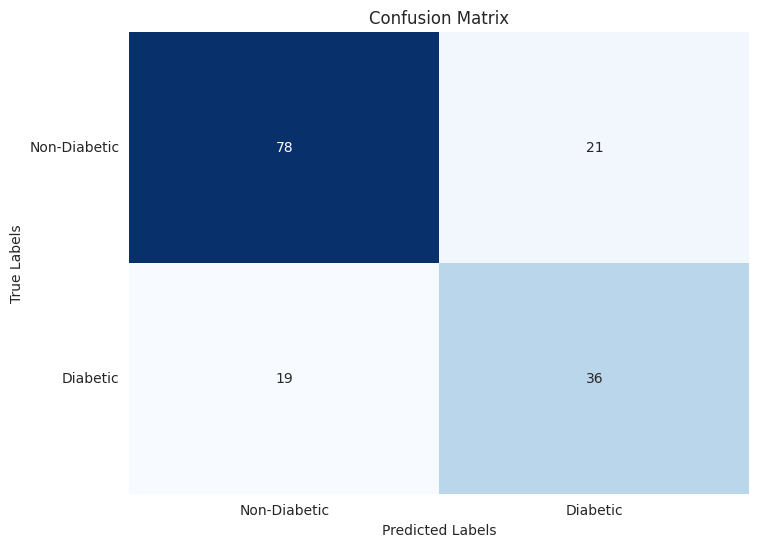

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Non-Diabetic', 'Diabetic'])
plt.yticks(np.arange(2) + 0.5, ['Non-Diabetic', 'Diabetic'], rotation=0)
plt.show()

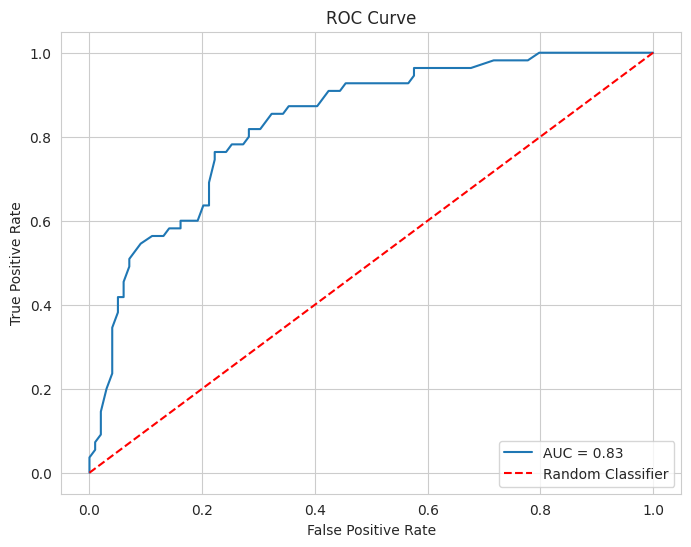

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC score
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## **Knowledge Representation**

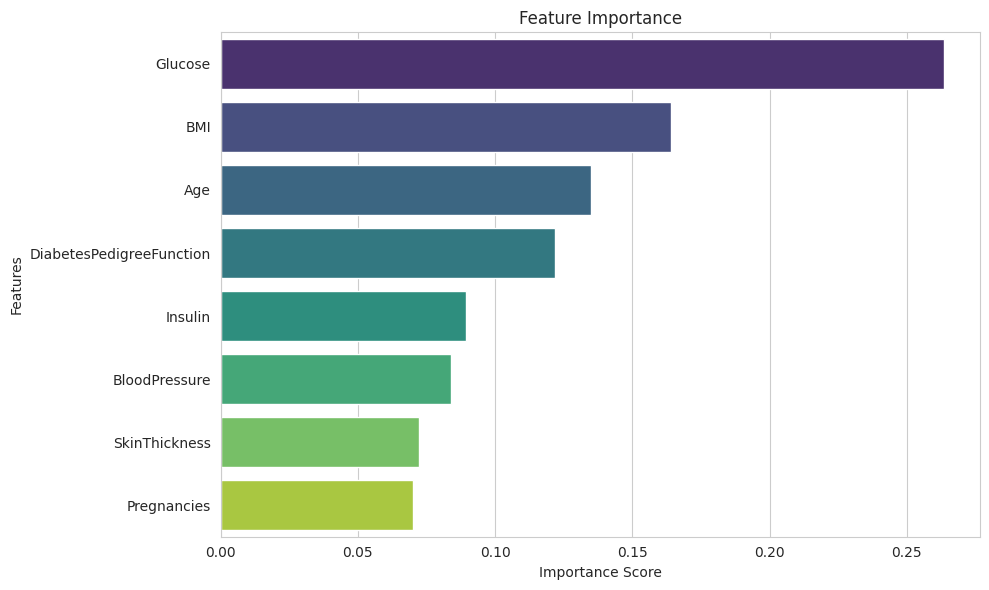

In [17]:
# Extract feature importance from the Random Forest classifier
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The bar chart above displays the feature importance as determined by the Random Forest classifier:

- Glucose: This feature has the highest importance score, indicating that plasma glucose concentration plays a significant role in determining diabetic status.

- BMI and Age: These features also have relatively high importance scores.

- DiabetesPedigreeFunction, BloodPressure, Pregnancies, Insulin, and SkinThickness: These features have moderate to lower importance scores.

The Random Forest classifier shows good performance in predicting the diabetic status of individuals.

## **Saving the Model**

In [18]:
import joblib

# Serialize the trained Random Forest classifier to a file
model_filename = "random_forest_diabetes_model.pkl"
joblib.dump(rf_classifier, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_diabetes_model.pkl
